In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('ex2data1.txt', header=None)

In [17]:
# display first 5 rows from Data
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
# analysis on data
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [19]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2:3].values

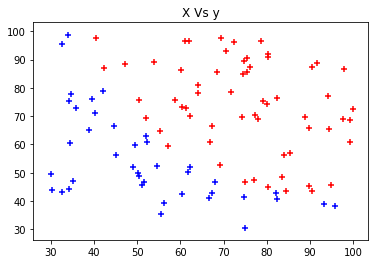

In [20]:
# Visualize the data to better understand
pos, neg = (y==1).reshape(100,1), (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c = 'r',  marker='+')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c = 'b',  marker='+')
plt.title('X Vs y')
plt.show()

In [21]:
# Feature NOrmalization
def featureNormalization(X):
    
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X-mean)/std
    
    return X_norm

In [22]:
X = featureNormalization(X)

In [23]:
# Sigmoid function
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [24]:
# Compute Cost Function
def costFunction(X, y, theta):
    
    m, n = X.shape
    X = np.hstack((np.ones((m,1)),X))
    
    # Compute cost
    predictions = sigmoid(X@theta)
    error = (-y * np.log(predictions)) - ((1-y) * np.log(1-predictions))
    cost = (1/m)*sum(error)
    grad = (1/m)*(X.T @ (predictions-y))
    
    return cost[0], grad

In [25]:
n = X.shape[1]
theta = np.zeros((n+1, 1))
cost, grad = costFunction(X, y, theta)

print('Size of Cost: ',cost,' value of grad: ', grad)

Size of Cost:  0.693147180559946  value of grad:  [[-0.1       ]
 [-0.28606568]
 [-0.24664251]]


In [37]:
# Compute gradient descent
def gradientDescent(X, y, alpha, number_iterations):
    
    m, n = X.shape
    theta = np.zeros((n+1, 1))
    J_hist = []
    
    # Compute gradient descent
    for i in range(number_iterations):
        cost, grad = costFunction(X, y, theta)
        
        theta = theta - (alpha * grad)
        J_hist.append(cost)
        
                
    return J_hist, theta

In [39]:
J_history, theta_final = gradientDescent(X, y, 1, 500)
print("Theta value: ", theta_final)

Theta value:  [[1.68739493]
 [3.83697462]
 [3.74561532]]


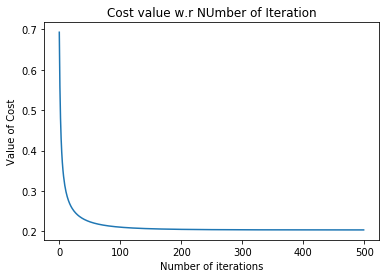

In [40]:
# Plotting of cost function
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Value of Cost')
plt.title('Cost value w.r NUmber of Iteration')
plt.show()

In [61]:
# Prediction on data
def predict(X, y, theta):
    
    m = len(X)
    X = np.hstack((np.ones((m,1)),X))
    
    pred = X @ theta
    
    return pred>0
    

In [62]:
X_test = [[35.84740876993872,72.90219802708364],[60.18259938620976,86.30855209546826]]
X_test = featureNormalization(X_test)
y_test = [[0],[1]]

pred = predict(X_test, y_test, theta_final)
print('Predicted Values: ',pred,', Actual values: ',y_test)

Predicted Values:  [[False]
 [ True]] , Actual values:  [[0], [1]]


In [63]:
# Predictions on Data
predictions = predict(X, y, theta_final)
print('Accuracy on Data: ', sum(predictions == y)[0],'%')

Accuracy on Data:  89 %


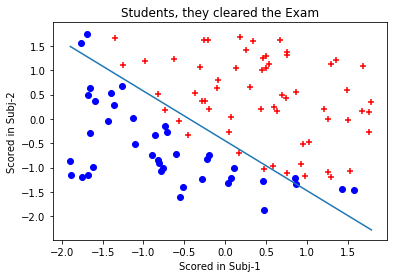

In [53]:
# Plotting the decision boundary
pos, neg = (y==1).reshape(100,1), (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c = 'r',  marker='+')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c = 'b',  marker='o')
X_values = np.array([np.min(X[:,0]), np.max(X[:,0])])
y_values = -(theta_final[0]+theta_final[1]*X_values)/theta_final[2]
plt.plot(X_values, y_values)
plt.xlabel('Scored in Subj-1')
plt.ylabel('Scored in Subj-2')
plt.title('Students, they cleared the Exam')
plt.show()